# 8.6.3 Eigenvalue problems

### シュレディンガー方程式の解
![formula](./image/0863.png)
![formula](./image/0863_01.png)
![formula](./image/0863_02.png)
- 初期条件を与え、境界での値をルンゲクッタ法により微分方程式により求める。
- secant methodにより、解を求める。

In [1]:
from numpy import array,arange
from math import sin, cos
from numpy import array,arange, pi
from pylab import plot, xlabel, show, grid

In [2]:
m = 9.1094e-31
hbar = 1.0546e-34
e = 1.6022e-19
L = 5.2918e-11
N = 1000
h = L/N
V0 = 100*e


In [3]:
def V(x):    
    return V0*(x/L)*(x/L-1) 

# def V(x):
#     return 0.0


def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x) - E)*psi
    return array([fpsi, fphi], float)

In [4]:
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    
    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1, x+0.5*h, E)
        k3 = h*f(r+0.5*k2, x+0.5*h, E)
        k4 = h*f(r+k3, x+h, E)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
#     print(r[0],r[1]) 
    
    return r[0]


In [5]:
E1 = 0.0
E2 = 500*e
psi2 = solve(E1)
target = e/1000
while abs(E1 - E2) > target:
    psi1, psi2 = psi2, solve(E2)
    E1, E2 = E2,E2 - psi2*(E2 - E1)/(psi2 - psi1)
#     print(E2/e)
    
print("E=", E2/e, "eV")

E= 519.1995059854486 eV


### 特定エネルギーでの波動関数のグラフ（横軸：E、縦軸：ψ）
- Eの値を変えるとグラフの形がかわる。

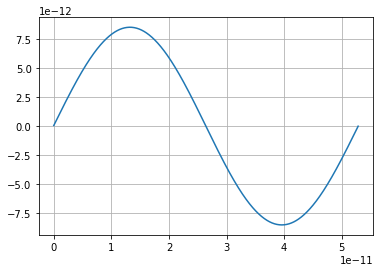

In [6]:
E = 519*e

psi = 0.0
phi = 1.0

tpoints = arange(0,L,h)
xpoints = []

r = array([psi,phi],float)
for x in arange(0,L,h):
    k1 = h*f(r,x,E)
    k2 = h*f(r+0.5*k1, x+0.5*h, E)
    k3 = h*f(r+0.5*k2, x+0.5*h, E)
    k4 = h*f(r+k3, x+h, E)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    xpoints.append(r[0])

grid()
plot(tpoints, xpoints)


### エネルギーと波動関数のグラフ
- エネルギーを0から600eVまで変化させたときの、x=L（境界）での波動関数の値（規格化はしていない）の値をグラフ化したもの。横軸がE、縦軸が波動関数
- 縦軸が0になっているところでのエネルギーが固有値
- グラフからも、134eV付近に解があることがわかる。（V0 = 0の場合）
- 540eVあたりにも解があることがわかる。（V0 = 0の場合）

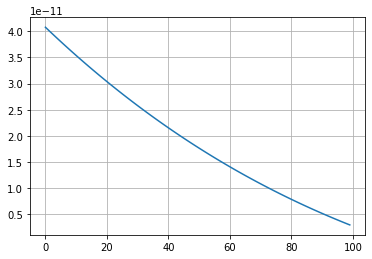

In [155]:
x = arange(0, 100, 1)

y = []
for t in x:
    y.append(solve(t*e))

grid()
plot(x,y)